In [2]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'affectnet-training-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2812806%2F4860972%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240819%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240819T145216Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79f5cf340b306f1e4bbf04a82f8e68d72cad695f3bbd7a1999732f1e952365828914788007e136c0ce0bd7f381d6944059f93a7a151a00b19b5ab06d6c91dacfe1e20cf4020177d8c50dd9d41f99c332bcfb09846309bba39cb58c54a4d08fe7e857748185f66c8f2cb96196c2bd53583360b66771b43eca855aa39492dfbbecbd253617f97c3c461fbf9083a2fc20b42615d21f69848b64ed3800de943510686dc0b03a5d5c1c50bf6aa9f3c7925c6d613d0c5153edbf57d87c20b84eb1f26d1b5162b77c73adec3b6f925963a63b73ae8c96123b26b89582f751c02d9e585032df20e268bd9a7814ebc48cf06d78c6542a72c2c3153b7c585c830866a06e22'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 329755345 bytes downloaded
Downloaded and uncompressed: affectnet-training-data
Data source import complete.


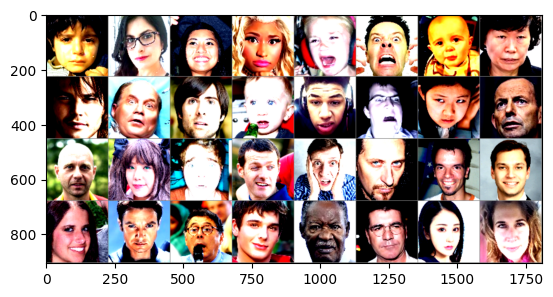

Epoch 1/10: 100%|██████████| 727/727 [01:58<00:00,  6.12batch/s]


Epoch 1/10, Loss: 1.4576, Train Accuracy: 0.4815


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.85batch/s]


Validation Loss: 0.9641, Validation Accuracy: 0.6404


Epoch 2/10: 100%|██████████| 727/727 [01:58<00:00,  6.16batch/s]


Epoch 2/10, Loss: 1.3226, Train Accuracy: 0.5410


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.08batch/s]


Validation Loss: 0.9263, Validation Accuracy: 0.6686


Epoch 3/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 3/10, Loss: 1.2773, Train Accuracy: 0.5578


Validation: 100%|██████████| 182/182 [00:18<00:00, 10.04batch/s]


Validation Loss: 0.8878, Validation Accuracy: 0.6896


Epoch 4/10: 100%|██████████| 727/727 [01:58<00:00,  6.16batch/s]


Epoch 4/10, Loss: 1.2259, Train Accuracy: 0.5826


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.38batch/s]


Validation Loss: 0.8727, Validation Accuracy: 0.6907


Epoch 5/10: 100%|██████████| 727/727 [01:58<00:00,  6.13batch/s]


Epoch 5/10, Loss: 1.1673, Train Accuracy: 0.6044


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.28batch/s]


Validation Loss: 0.8724, Validation Accuracy: 0.7012


Epoch 6/10: 100%|██████████| 727/727 [01:58<00:00,  6.14batch/s]


Epoch 6/10, Loss: 1.1274, Train Accuracy: 0.6240


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.36batch/s]


Validation Loss: 0.8526, Validation Accuracy: 0.7092


Epoch 7/10: 100%|██████████| 727/727 [01:57<00:00,  6.16batch/s]


Epoch 7/10, Loss: 1.0602, Train Accuracy: 0.6506


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.79batch/s]


Validation Loss: 0.9281, Validation Accuracy: 0.6764


Epoch 8/10: 100%|██████████| 727/727 [01:58<00:00,  6.16batch/s]


Epoch 8/10, Loss: 0.9942, Train Accuracy: 0.6795


Validation: 100%|██████████| 182/182 [00:18<00:00,  9.89batch/s]


Validation Loss: 0.9392, Validation Accuracy: 0.6903


Epoch 9/10: 100%|██████████| 727/727 [01:58<00:00,  6.15batch/s]


Epoch 9/10, Loss: 0.9607, Train Accuracy: 0.6961


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.15batch/s]


Validation Loss: 0.9202, Validation Accuracy: 0.6853


Epoch 10/10: 100%|██████████| 727/727 [01:57<00:00,  6.17batch/s]


Epoch 10/10, Loss: 0.9022, Train Accuracy: 0.7139


Validation: 100%|██████████| 182/182 [00:17<00:00, 10.44batch/s]


Validation Loss: 0.9321, Validation Accuracy: 0.6912


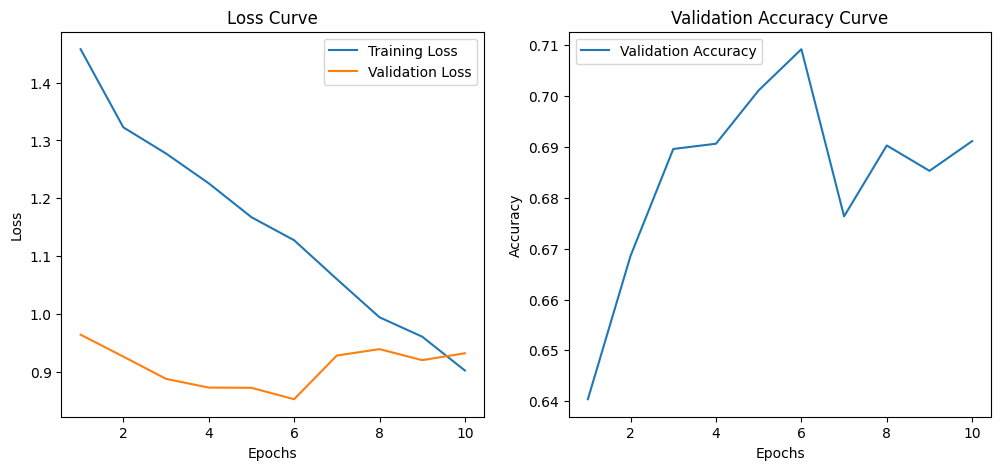

Classification Report for Validation Set:
              precision    recall  f1-score   support

       anger       0.51      0.61      0.56       626
    contempt       0.73      0.60      0.66       556
     disgust       0.51      0.53      0.52       496
        fear       0.55      0.49      0.52       615
       happy       0.91      0.93      0.92      1036
     neutral       0.89      0.88      0.89      1045
         sad       0.57      0.52      0.54       632
    surprise       0.60      0.65      0.62       803

    accuracy                           0.69      5809
   macro avg       0.66      0.65      0.65      5809
weighted avg       0.69      0.69      0.69      5809



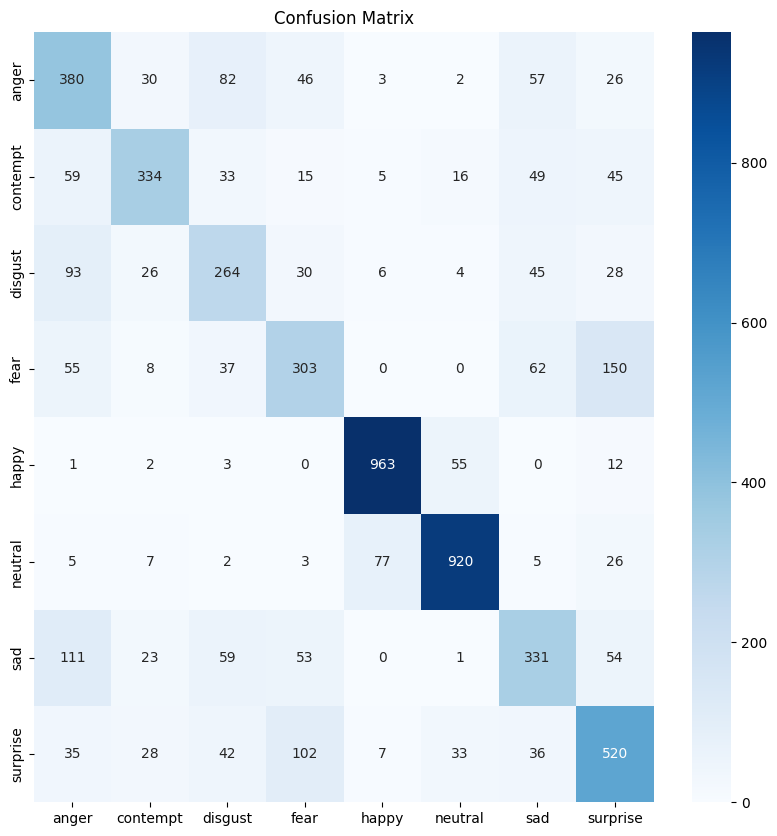

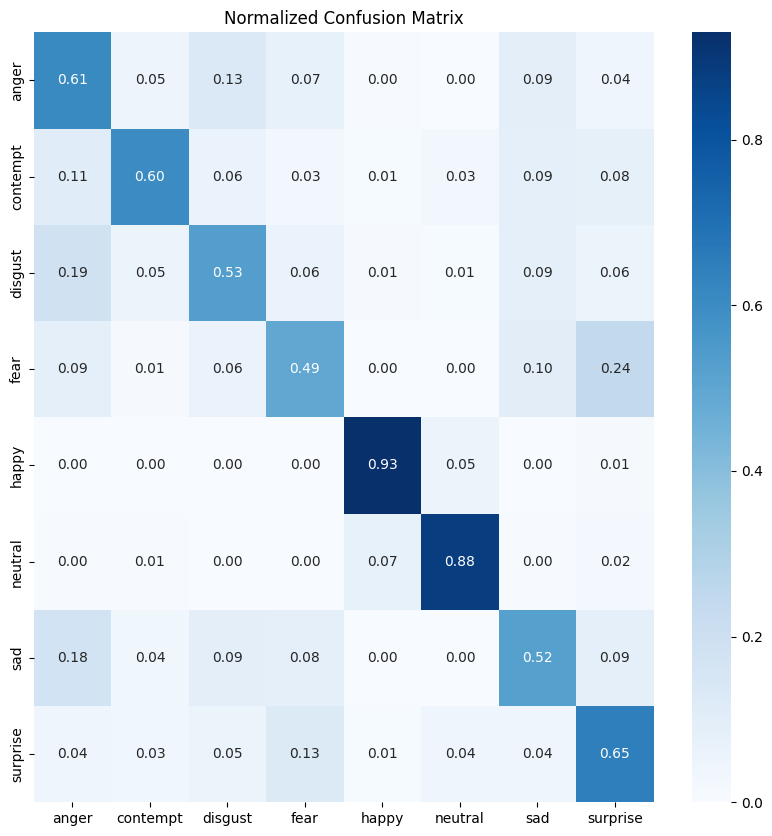

In [19]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from torchvision import models
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from torchvision.utils import make_grid
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Set device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#To Load Custom loadAffectNetdata class
class loadAffectNetdata(datasets.ImageFolder):
    def find_classes(self, directory):
        classes = [d.name for d in os.scandir(directory) if d.is_dir() and d.name != ".ipynb_checkpoints"]
        classes.sort()
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

# Defining Dynamic Augmentation Class
class DynamicAugmenter:
    def __init__(self):
        self.transformations = [
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.5, contrast=0.5),
            transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
            transforms.RandomAffine(degrees=20, translate=(0.1, 0.1)),
            transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
        ]
        self.current_transforms = []

    def update_augmentation(self, val_accuracy):
        if val_accuracy < 0.6:
            self.current_transforms = random.sample(self.transformations, k=5)
        else:
            self.current_transforms = random.sample(self.transformations, k=3)

    def __call__(self, img):
        transform = transforms.Compose(self.current_transforms + [transforms.ToTensor()])
        return transform(img)

# Initial Transformations
base_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Loading the dataset
base_dir = '/kaggle/input/affectnet-training-data'
dataset = loadAffectNetdata(root=base_dir, transform=base_transform)

# Splitting the dataset in 80-20 ratio
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Displaying some sample images
data_iter = iter(train_loader)
images, labels = next(data_iter)

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(make_grid(images))

# Model instantiation
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(model.fc.in_features, 8)
model.to(device)

# Loss, Optimizer and Scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=10)

# Defining Mixup functions
def mixup_data(x, y, alpha=1.0):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

# Initializing lists to store loss and accuracy values
train_losses = []
val_losses = []
val_accuracies = []

# Training Loop
num_epochs = 10
augmenter = DynamicAugmenter()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        images, labels = images.to(device), labels.to(device)

        # Applying Mixup
        images, labels_a, labels_b, lam = mixup_data(images, labels, alpha=1.0)

        optimizer.zero_grad()

        outputs = model(images)
        loss = mixup_criterion(criterion, outputs, labels_a, labels_b, lam)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (lam * (predicted == labels_a).sum().item() + (1 - lam) * (predicted == labels_b).sum().item())

    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')

    #Evaluating on the Validation set for dynamic augmentation
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation', unit='batch'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_accuracy = correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

    # Updating dynamic augmenter based on validation accuracy
    augmenter.update_augmentation(val_accuracy)

    # Adjust learning rate with scheduler
    scheduler.step()

# Save the model
torch.save(model.state_dict(), 'resnet18_affectnet_mixup.pth')

# Plotting Loss and Accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy Curve')
plt.show()

# Evaluating the model
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

all_labels = np.array(all_labels)
all_preds = np.array(all_preds)

# Classification Report
report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print("Classification Report for Validation Set:")
print(report)

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=dataset.classes)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Confusion Matrix')
plt.show()

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plotting Normalized Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Normalized Confusion Matrix')
plt.show()



In [ ]:
import torch
import matplotlib.pyplot as plt

#function to show sample predictions with the trained model
def show_example_predictions(model, loader, num_images=8):
    model.eval()
    images_so_far = 0
    fig, axes = plt.subplots(2, 4, figsize=(18, 9))
    axes = axes.flatten()

    with torch.no_grad():
        for i, (images, labels) in enumerate(loader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            for j in range(images.size(0)):
                if images_so_far == num_images:
                    break

                ax = axes[images_so_far]
                ax.axis('off')
                ax.set_title(f'Pred: {dataset.classes[preds[j]]}\nTrue: {dataset.classes[labels[j]]}', fontsize=16)  # Increased font size

                # Normalizing and preparing the image for display
                image = images[j].cpu().data
                image = image / 2 + 0.5  # Unnormalized form
                image = torch.clamp(image, 0, 1)
                np_image = image.numpy().transpose((1, 2, 0))

                ax.imshow(np_image)
                images_so_far += 1

            if images_so_far == num_images:
                break

    plt.tight_layout(pad=3.0)  # padding to avoid overlap
    plt.show()

show_example_predictions(model, val_loader, num_images=8)


In [20]:
dataset

Dataset loadAffectNetdata
    Number of datapoints: 29042
    Root location: /kaggle/input/affectnet-training-data
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [22]:
len(train_dataset)

23233

In [21]:
len(val_dataset)

5809

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Class Distribution in this subset of AffectNet Dataset:
anger: 3218 images
contempt: 2871 images
disgust: 2477 images
fear: 3176 images
happy: 5044 images
neutral: 5126 images
sad: 3091 images
surprise: 4039 images


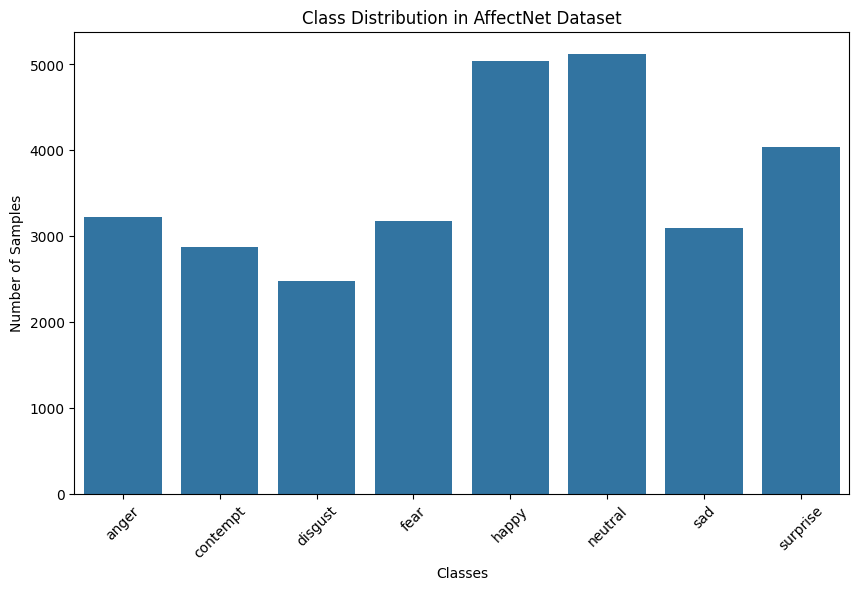

In [25]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns

# To Count the occurrences of each class in the dataset
class_counts = collections.Counter(dataset.targets)

# Mapping class indices to class names
class_names = [dataset.classes[i] for i in range(len(dataset.classes))]

# Preparing data for plotting
counts = [class_counts[i] for i in range(len(dataset.classes))]
class_distribution = dict(zip(class_names, counts))

# To Print the counts for each class
print("Class Distribution in this subset of AffectNet Dataset:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} images")

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title('Class Distribution in AffectNet Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()


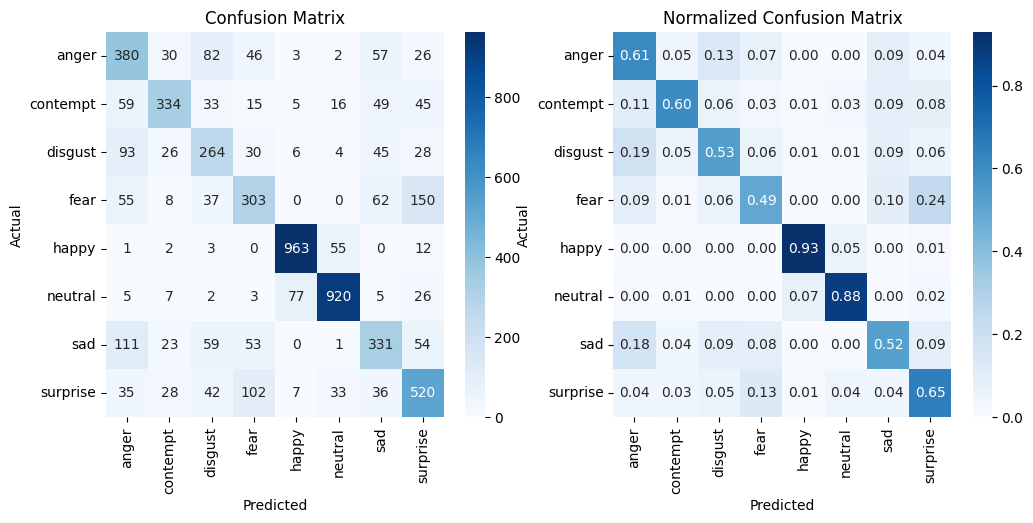

In [23]:
# Plotting Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm,cmap='Blues', fmt='d',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Normalized Confusion Matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#cmd_normalized = ConfusionMatrixDisplay(cm_normalized, display_labels=dataset.classes)

# Plotting Normalized Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_normalized,cmap='Blues', fmt='.2f',annot=True, xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()


Class Distribution in Train Dataset:
Class 0: 2592 images
Class 1: 2315 images
Class 2: 1981 images
Class 3: 2561 images
Class 4: 4008 images
Class 5: 4081 images
Class 6: 2459 images
Class 7: 3236 images


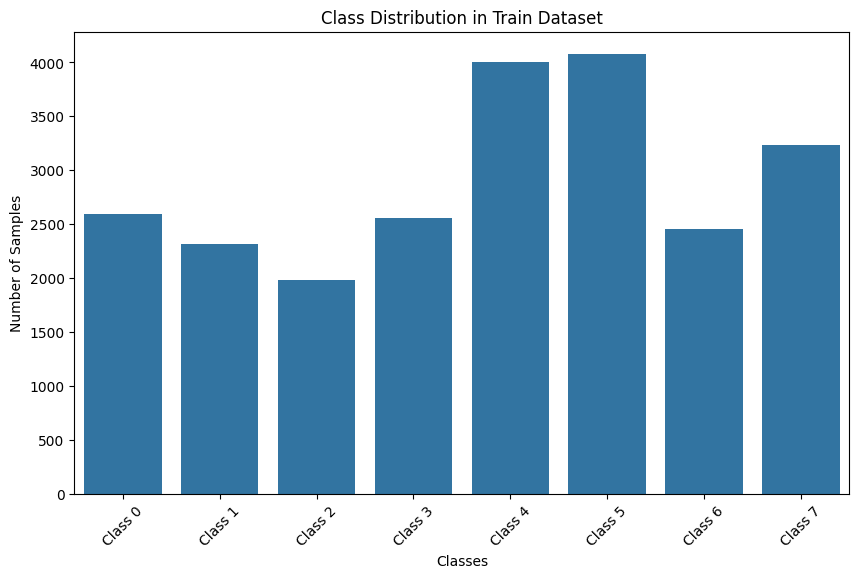

Class Distribution in Validation Dataset:
Class 0: 626 images
Class 1: 556 images
Class 2: 496 images
Class 3: 615 images
Class 4: 1036 images
Class 5: 1045 images
Class 6: 632 images
Class 7: 803 images


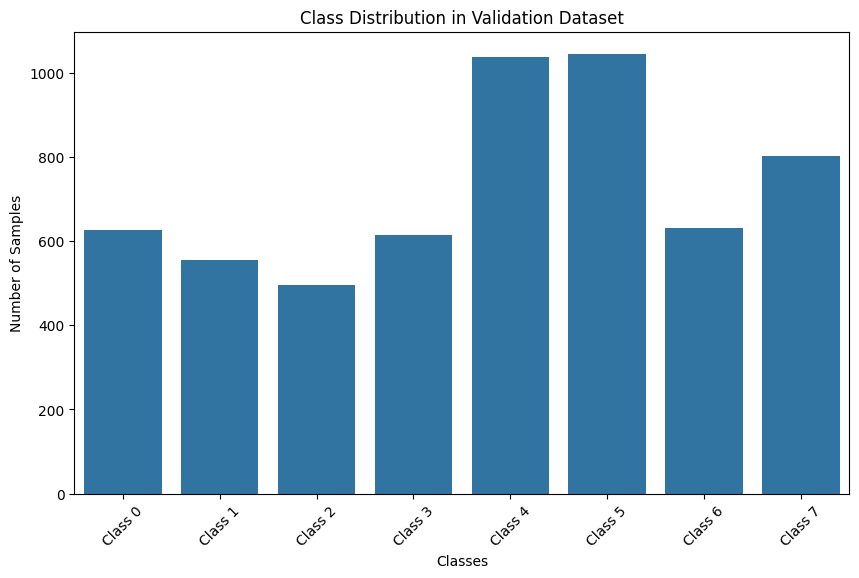

In [28]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns

def extract_class_counts(dataset):
    # Extracting the class numbers from the dataset
    class_numbers = [int(data[1]) for data in dataset]

    # To Count the occurrences of each class
    class_counts = collections.Counter(class_numbers)

    return class_counts

def plot_class_distribution(dataset, dataset_name):
    # Getting the class counts
    class_counts = extract_class_counts(dataset)

    # Mapping class indices to class names
    class_names = [f'Class {i}' for i in range(len(class_counts))]

    # Prepare data for plotting
    counts = [class_counts[i] for i in range(len(class_counts))]
    class_distribution = dict(zip(class_names, counts))

    # To Print the counts for each class
    print(f"Class Distribution in {dataset_name}:")
    for class_name, count in class_distribution.items():
        print(f"{class_name}: {count} images")

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
    plt.title(f'Class Distribution in {dataset_name}')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_dataset, "Train Dataset")
plot_class_distribution(val_dataset, "Validation Dataset")


In [30]:
dataset.class_to_idx

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7}